<a href="https://colab.research.google.com/github/Hemachandran-123/Home_price_prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
data=pd.read_csv("/content/Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
data.shape


(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data2= data.drop(['area_type','availability','society',"balcony"], axis="columns")
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data3=data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
data3.shape

(13246, 5)

In [9]:
data3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
data3['BHK']=data3['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-11-1af4ea19739d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['BHK']=data3['size'].apply(lambda x: int(x.split(" ")[0]))


In [12]:
data3.head( )

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
data3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
data3[data3.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [15]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [17]:
data3[~data3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def convert_sqft_tonum(x):
  tokens= x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+ float(tokens[1]))/2
  try:
     return float(x)
  except:
    return None

In [19]:
convert_sqft_tonum('2100')

2100.0

In [20]:
convert_sqft_tonum('2100 - 2850')

2475.0

In [21]:
convert_sqft_tonum('34.46Sq. Meter')

In [22]:
data4=data3.copy()
data4['total_sqft']= data4['total_sqft'].apply(convert_sqft_tonum)
data4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [24]:
data4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
data5=data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [26]:
len(data5.location.unique())

1304

Dimensionality redution


In [27]:
data5.location= data5.location.apply(lambda x: x.strip())
location_stats= data5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [28]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])


1052

In [30]:
location_less=location_stats[location_stats<=10]
location_less

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_less else x)
len(data5.location.unique())

242

In [32]:
data5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


removing outliers


In [33]:
data5[data5.total_sqft/data5.BHK<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [34]:
data5.shape

(13246, 7)

In [35]:
data6= data5[~(data5.total_sqft/data5.BHK<300)]
data6.shape

(12502, 7)

In [36]:
data6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
def remove_outliers_pps(data):
  df_out= pd.DataFrame()
  for key,subdf in data.groupby('location'):
    m= np.mean(subdf.price_per_sqft)
    st= np.std(subdf.price_per_sqft)
    reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out= pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

data7= remove_outliers_pps(data6)
data7.shape


(10241, 7)

In [39]:
def plot_scatter(data,location):
  bhk2= data[(data.location==location)& (data.BHK==2)]
  bhk3= data[(data.location==location)& (data.BHK==3)]
  plt.scatter(bhk2.total_sqft, bhk2.price, color="blue",label=" 2 BHK", s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color="green", label=" 3 BHK", s=50)
  plt.xlabel("total sqf area")
  plt.ylabel("price per square feet")
  plt.title(location)
  plt.legend()

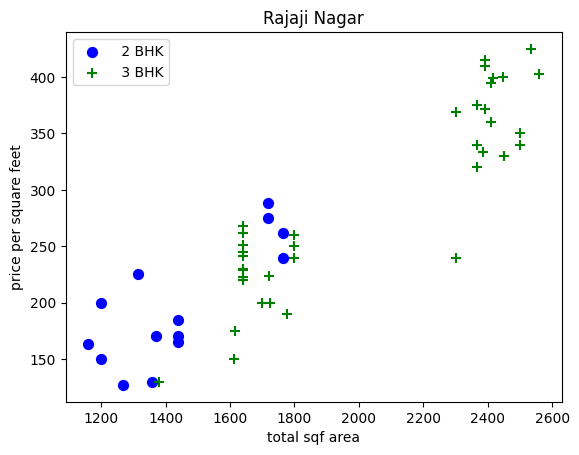

In [40]:
plot_scatter(data7,"Rajaji Nagar")

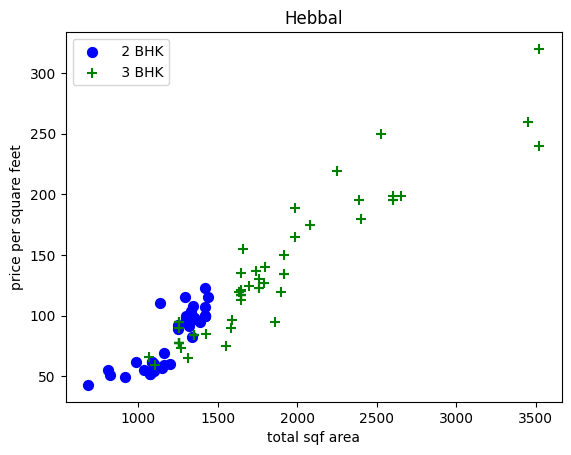

In [41]:
plot_scatter(data7,"Hebbal")

In [42]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')



In [43]:
data8 = remove_bhk_outliers(data7)
data8.shape

(7329, 7)

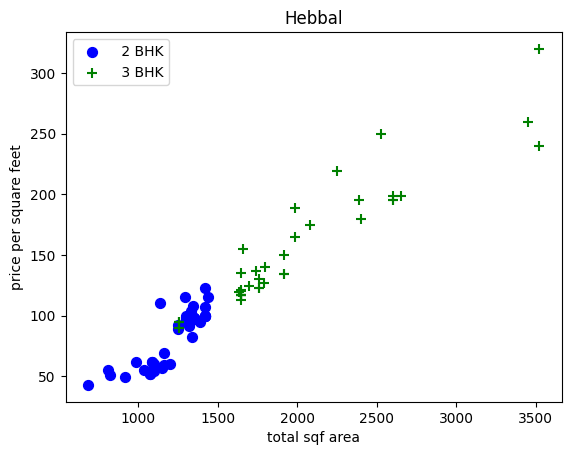

In [44]:
plot_scatter(data8,"Hebbal")

(array([ 548., 3591., 2300.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

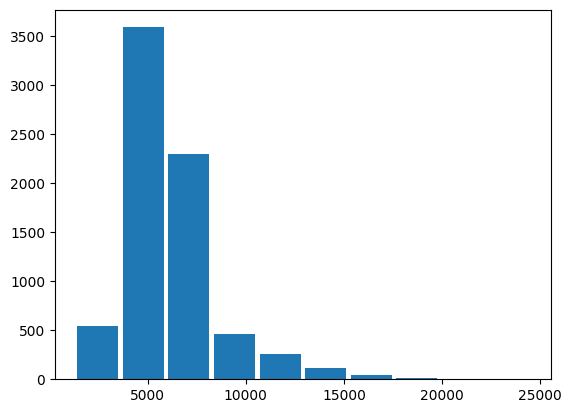

In [45]:
plt.hist(data8.price_per_sqft,rwidth=0.9)

In [46]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

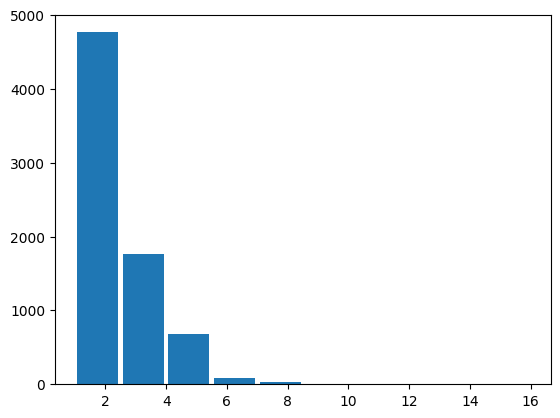

In [48]:
plt.hist(data8.bath, rwidth=0.9)

In [49]:
data8[data8.bath>data8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
data9= data8[data8.bath<data8.BHK+2]
data9.shape

(7251, 7)

In [51]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [52]:
data10.shape

(7251, 5)

In [53]:
dummies= pd.get_dummies(data10['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
data11= pd.concat([data10,dummies.drop('other', axis='columns')],axis='columns')
data11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
data12= data11.drop('location',axis='columns')
data12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
X= data12.drop('price', axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
y= data12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=30)

In [59]:
from sklearn.linear_model import LinearRegression
ln= LinearRegression()
ln.fit(x_train,y_train)
ln.score(x_test,y_test)

0.8467965332398288

In [60]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [61]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [62]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [63]:
def predict_price(location,total_sqft,bath,BHK):
  loc_index= np.where(X.columns==location)[0][0]

  x= np.zeros(len(X.columns))
  x[0]= total_sqft
  x[1]=bath
  x[2]= BHK
  if loc_index>=0:
    x[loc_index]=1

  return ln.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.2363674731082

In [65]:
predict_price('1st Phase JP Nagar',1000,2,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.61895173788392

In [66]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


165.818103224441

In [67]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
  pickle.dump(ln,f)

In [68]:
import json
columns ={
    'data_columns' : [col.lower() for col in X.columns]

}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))